In [23]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
import plotly.express as px
from scipy.stats import ttest_ind

# Load data from a CSV file
df = pd.read_csv('my_data.csv')
df['Date'] = pd.to_datetime(df['Date'])


# Midterm Dates 
midterm_dates = pd.to_datetime(['2023-11-15', '2023-11-16', '2023-11-17', '2023-11-20', '2023-11-21', '2023-11-22','2023-11-23', '2023-11-27', '2023-11-28','2023-11-29','2023-11-30'])
df['Midterm'] = df['Date'].isin(midterm_dates)
# Create a new column to classify each date as 'Midterm' or 'Non-Midterm'
df['Period'] = df['Date'].apply(lambda x: 'Midterm' if x in midterm_dates else 'Non-Midterm')

# Calculate the average daily usage for each period
mean_usage = df.groupby('Period')['Total Daily Usage (minutes)'].mean().reset_index()

# Rename the columns for your plot
mean_usage_df = mean_usage.rename(columns={'Total Daily Usage (minutes)': 'Average Daily Usage (minutes)'})

# Total Daily Usage T-test
total_daily_usage_midterm = df[df['Midterm']]['Total Daily Usage (minutes)']

total_daily_usage_non_midterm = df[~df['Midterm']]['Total Daily Usage (minutes)']
print(total_daily_usage_midterm)
t_stat_daily_usage, p_value_daily_usage = ttest_ind(total_daily_usage_midterm, total_daily_usage_non_midterm, nan_policy='omit')

# Click Times T-test
click_times_midterm = df[df['Midterm']]['Click Times']
click_times_non_midterm = df[~df['Midterm']]['Click Times']
t_stat_click_times, p_value_click_times = ttest_ind(click_times_midterm, click_times_non_midterm, nan_policy='omit')

print(t_stat_daily_usage, p_value_daily_usage, t_stat_click_times, p_value_click_times)
# Feature Engineering
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['Month'] = df['Date'].dt.month
df['IsMidterm'] = df['Midterm'].astype(int)

# Selecting features and target
X = df[['DayOfWeek', 'Month', 'IsMidterm']]
y = df['Total Daily Usage (minutes)']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter Tuning
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [3, 5, 7, None]
}
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), 
                           param_grid=param_grid, 
                           cv=5, 
                           scoring='neg_mean_squared_error', 
                           verbose=1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print(best_params)

# Training the Optimized Random Forest Model
optimized_rf_model = RandomForestRegressor(n_estimators=best_params['n_estimators'], 
                                           max_depth=best_params['max_depth'], 
                                           random_state=40)
optimized_rf_model.fit(X_train, y_train)

# Predicting and Evaluating
y_pred_optimized_rf = optimized_rf_model.predict(X_test)
rmse_optimized_rf = np.sqrt(mean_squared_error(y_test, y_pred_optimized_rf))

# Feature Importance
feature_importance_optimized_rf = optimized_rf_model.feature_importances_

# Output
print("Optimized Random Forest Model RMSE:", rmse_optimized_rf)
print("Feature Importance:", dict(zip(X.columns, feature_importance_optimized_rf)))

8      73
9      52
10     47
13     73
14     59
15     58
16    101
20     46
21     55
22    156
23     72
Name: Total Daily Usage (minutes), dtype: int64
-2.8866918761766502 0.0058198401933578095 -1.7571599950341907 0.08526753050628587
Fitting 5 folds for each of 12 candidates, totalling 60 fits
{'max_depth': 3, 'n_estimators': 100}
Optimized Random Forest Model RMSE: 32.46572554147272
Feature Importance: {'DayOfWeek': 0.5110061996998798, 'Month': 0.3787169959670831, 'IsMidterm': 0.11027680433303727}


In [24]:

display (df)

,Date,Total Daily Usage (minutes),Click Times,Midterm,Period,DayOfWeek,Month,IsMidterm
0,2023-11-07,59,90,False,Non-Midterm,1,11,0
1,2023-11-08,58,126,False,Non-Midterm,2,11,0
2,2023-11-09,85,103,False,Non-Midterm,3,11,0
3,2023-11-10,79,95,False,Non-Midterm,4,11,0
4,2023-11-11,51,77,False,Non-Midterm,5,11,0
5,2023-11-12,52,67,False,Non-Midterm,6,11,0
6,2023-11-13,60,65,False,Non-Midterm,0,11,0
7,2023-11-14,68,90,False,Non-Midterm,1,11,0
8,2023-11-15,73,126,True,Midterm,2,11,1
9,2023-11-16,52,87,True,Midterm,3,11,1


In [25]:
import plotly.express as px

# Assuming df is your DataFrame with the correct data

# Creating an interactive line chart for Total Daily Usage
fig = px.line(df, x='Date', y='Total Daily Usage (minutes)', 
              title='Daily Total X Usage with Midterm Days Highlighted',
              color='Midterm', labels={'Midterm': 'Is Midterm Day'})

# Adjust the layout to move the x-axis title down a bit
fig.update_layout(
    margin=dict(l=40, r=40, t=40, b=80),  # You may need to adjust this bottom margin
    autosize=False,
    width=700,
    height=270,
    showlegend=False,
    xaxis=dict(
        tickangle=-45,  # Adjust the tick angle if necessary
        nticks=20,
        tickfont=dict(size=8),  # Adjust font size if needed
        title='Date',  # X-axis title
        title_standoff=40  # Distance of title from the axis in pixels
    ),
    yaxis=dict(
        title='Total Daily Usage (minutes)',
        tickfont=dict(size=8)
    )
)

# Save the plot as an HTML file
fig.write_html("twitter_usage_midterms1.html")

# Show the figure
fig.show()


In [26]:
# Create a bar chart with custom hover data
fig_means = px.bar(
    mean_usage_df,
    x='Period',
    y='Average Daily Usage (minutes)',
    title = "Average Daily X Usage: Midterm vs Non-Midterm Periods",
    # Set the hover_data to include only the desired information
    hover_data={
        'Period': False,  # We don't need to repeat the period as it's already on the x-axis
        'Average Daily Usage (minutes)': ':.2f'  # Format to 2 decimal places
    },
    # Remove the 'text' parameter as we will set hover data directly
)

# Customize layout and trace properties
fig_means.update_layout(
    width=580,  # Width of the figure in pixels
    height=230,  # Height of the figure in pixels
    margin=dict(t=50, b=30),  # Top and bottom margins
    font=dict(size=10),  # Font size
    legend=dict(
        title='',  # Legend title
        orientation='h',  # Horizontal legend
        yanchor='bottom',  # Anchor legend at the bottom
        y=-0.2,  # Position legend below the x-axis
        xanchor='center',  # Center the legend
        x=0.5,  # Position at the middle of the width
    ),
    yaxis=dict(
        
        tickfont=dict(size=8)
    ),
    xaxis=dict(
        tickfont=dict(size=8)
    )
)

# Customize the bar appearance
fig_means.update_traces(
    marker_color=['#4C78A8', '#F58518'],  # Colors of the bars
    marker_line_color='rgb(0,0,0)',  # Border color of the bars
    marker_line_width=1.5,  # Border width of the bars
    opacity=0.6  # Opacity of the bars
)

# Save the figure as an HTML file for use on the website
fig_means.write_html("twitter_usage_comparison1.html")

# Show the figure
fig_means.show()


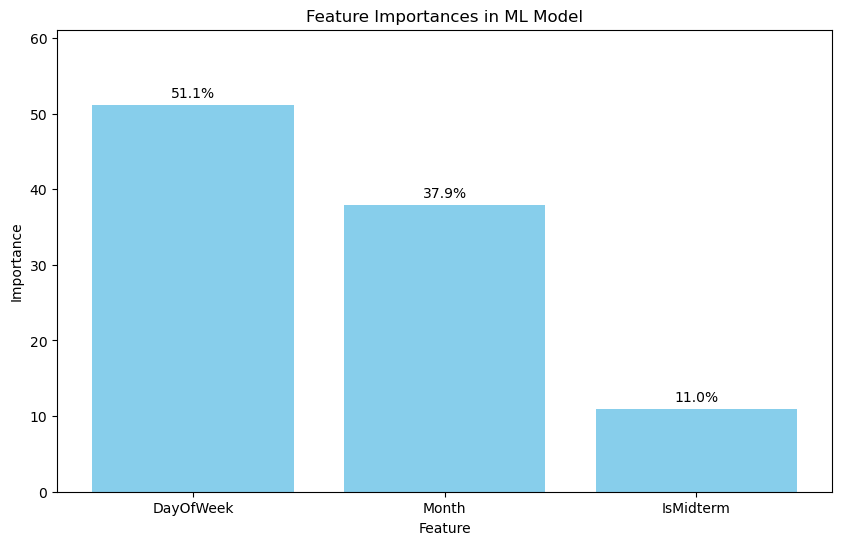

In [27]:
import matplotlib.pyplot as plt
import pandas as pd

# Data for feature importances
data = {
    'Feature': ['DayOfWeek', 'Month', 'IsMidterm'],
    'Importance': [51.1, 37.9, 11]
}

# Convert the data into a DataFrame
feature_df = pd.DataFrame(data)

# Create a bar chart using Matplotlib
plt.figure(figsize=(10, 6))
plt.bar(feature_df['Feature'], feature_df['Importance'], color='skyblue')
plt.title('Feature Importances in ML Model')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.ylim(0, max(feature_df['Importance']) + 10)  # Adjusting y-axis limit for better view
for i, v in enumerate(feature_df['Importance']):
    plt.text(i, v + 1, f"{v}%", ha='center')

# Save the chart as an image file
plt.savefig('feature_importance_chart.png', bbox_inches='tight')
plt.show()
# Close the plot
plt.close()
